In [1]:
#import the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# merging all files as single text file
rows = []
for file in os.listdir():
    if file.endswith('.txt'):
        for row in open(file):
            new_row = row.split('\t')
            new_row = new_row + ['-'] * (20-len(new_row))
            rows.append(new_row)
data = pd.DataFrame(rows,columns = ['video ID', 'uploader', 'age', 'category', 'length', 'views', 'rate', 'ratings', 'comments']+['related IDs'+str(i) for i in range(20)])


In [3]:
# top 5 rows
data.head()


,video ID,uploader,age,category,length,views,rate,ratings,comments,related IDs0,...,related IDs10,related IDs11,related IDs12,related IDs13,related IDs14,related IDs15,related IDs16,related IDs17,related IDs18,related IDs19
0,LKh7zAJ4nwo,TheReceptionist,653,Entertainment,424,13021,4.34,1305,744,DjdA-5oKYFQ,...,vmdPOOd6cxI,KRHfMQqSHpk,pIMpORZthYw,1tUDzOp10pk,heqocRij5P0,_XIuvoH6rUg,LGVU5DsezE0,uO2kj6_D8B4,xiDqywcDQRM,uX81lMev6_o\n
1,7D0Mf4Kn4Xk,periurban,583,Music,201,6508,4.19,687,312,e2k0h6tPvGc,...,EzKwOYLh-S0,eUIfRyrqwp8,AK8Wtfwe-1k,Eq4hGkIqBGw,N1lkLaLJHlc,-uIffs-DHkM,zpTorUhCd8Y,AvSK0qPw7EU,WX5KLMqY4bM,VKFqqoeMdjw\n
2,n1cEq1C8oqQ,Pipistrello,525,Comedy,125,1687,4.01,363,141,eprHhmurMHg,...,yLup8wjbSIo,lbf4d1pZI9c,uRQYan_-CTQ,gnpvEvuiFoQ,F2_5KOnSsfI,DINu35v3eMU,9uSiyn7t_0o,YfShxdbAJS8,ssdfqTwZXY0,z5wDjq8o60c\n
3,OHkEzL4Unck,ichannel,638,Comedy,299,8043,4.4,518,371,eyUSTmEUQRg,...,LQUV_XGzHmA,8OmL_BJRLRw,qeCFW97-fOA,DVNwUKAuB3I,FMuWYExDEJk,rE7TuuXkk4E,bWicrzq2ApQ,jh6EpXnMb18,9JhU2jE02gg,nfBfC8bif1Y\n
4,-boOvAGNKUc,mrpitifulband,639,Music,287,7548,4.48,606,386,fmUwUURgsX0,...,eV2SdBITv8k,cIO6nFDnNs4,Bd7nAtOEA3U,RZo5MisSTWo,geiABCqmQ84,MG1Xv99426g,7wj8-HkZ0XQ,JsdCu9T47iY,OUeN4DhCIFw,sf-Ym_pFP6U\n


In [4]:
n,m=data.shape
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video ID       3508 non-null   object
 1   uploader       3508 non-null   object
 2   age            3508 non-null   object
 3   category       3508 non-null   object
 4   length         3508 non-null   object
 5   views          3508 non-null   object
 6   rate           3508 non-null   object
 7   ratings        3508 non-null   object
 8   comments       3508 non-null   object
 9   related IDs0   3508 non-null   object
 10  related IDs1   3508 non-null   object
 11  related IDs2   3508 non-null   object
 12  related IDs3   3508 non-null   object
 13  related IDs4   3508 non-null   object
 14  related IDs5   3508 non-null   object
 15  related IDs6   3508 non-null   object
 16  related IDs7   3508 non-null   object
 17  related IDs8   3508 non-null   object
 18  related IDs9   3508 non-null

,video ID,uploader,age,category,length,views,rate,ratings,comments,related IDs0,...,related IDs10,related IDs11,related IDs12,related IDs13,related IDs14,related IDs15,related IDs16,related IDs17,related IDs18,related IDs19
count,3508,3508,3508,3508,3508,3508,3508,3508,3508,3508,...,3508,3215,3214,3213,3207,3206,3206,3204,3189,3144
unique,3458,2158,402,14,654,2806,341,746,647,1948,...,2086,2095,2088,2083,2106,2110,2134,2149,2190,2166
top,\n,-,-,Comedy,-,-,5,0,0,-,...,-,vCY7W4Lnhk4,TFvum08n0nI,Lkk3ktC5W7s,f9vFpwmTbQ8,D7k8Ni_oEsE,6OZ0ruq0DH4,QezUyZ7pKQc,8aZ1KjQksXM,fVlC8oEINZk\n
freq,17,177,177,698,177,177,413,274,463,250,...,292,22,22,22,22,22,22,22,22,22


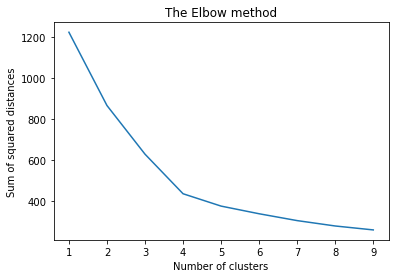

In [5]:
#kmeans elbow method
from sklearn.cluster import KMeans
import numpy as np
data = data[[ 'uploader', 'age', 'category', 'length', 'views', 'rate', 'ratings', 'comments']]
def repl(data,x):
    data[x].replace(data[x].unique(), range(len(data[x].unique())), inplace = True)

data = data.replace('-',0)
for col in ['uploader', 'category']:
    repl(data, col)

data = data.astype('float32').apply(lambda x: x/max(x))

wss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


kmeans = KMeans().fit(data.to_numpy()).predict(data.to_numpy())


In [6]:

pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


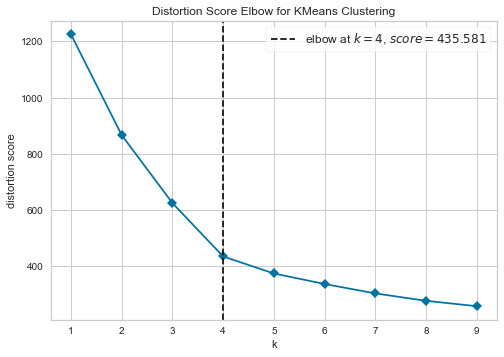

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# visualizing the elbow
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(data)
visualizer.show()

In [8]:

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.5439288020133972
For cluster: 3, the silhouette score is: 0.36132609844207764
For cluster: 4, the silhouette score is: 0.36291468143463135
For cluster: 5, the silhouette score is: 0.33575254678726196
For cluster: 6, the silhouette score is: 0.31767538189888
For cluster: 7, the silhouette score is: 0.31591367721557617
For cluster: 8, the silhouette score is: 0.3244301378726959
For cluster: 9, the silhouette score is: 0.31593140959739685


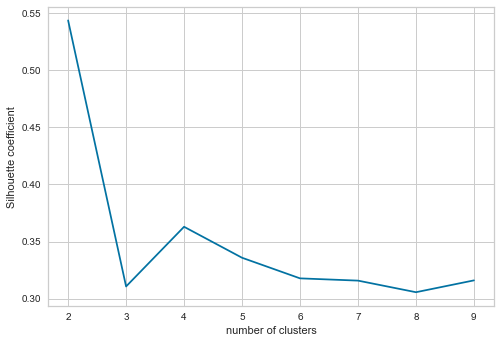

In [9]:
# silhoutte graph for kmeans
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

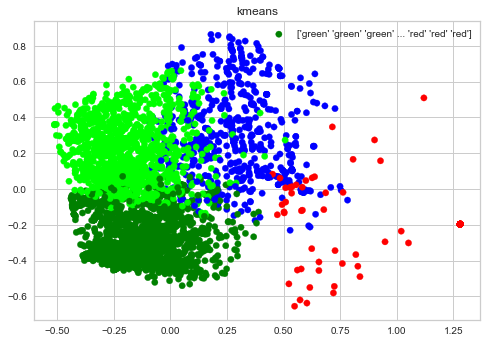

Silhouette Score: 0.3629
Calinski Harabasz Score: 2116.8830
Davies Bouldin Score: 0.9648


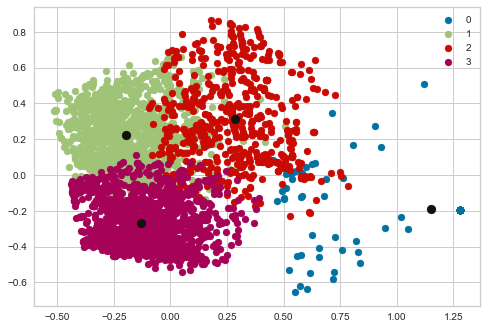

In [10]:
#kmeans
colormap = np.array(['red', 'lime', 'blue','green'])
pca = PCA()
X = pca.fit_transform(data)
kmeans = KMeans(n_clusters=4)
l = kmeans.fit_predict(X)
unique_labels = np.unique(l)


# In[23]:

#for i in unique_labels:
plt.scatter(X[:,0], X[:,1],c=colormap[l], s=40,label=colormap[l])
    
plt.legend()
plt.title('kmeans')
plt.show()

from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means

# Use fit_predict to cluster the data
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X,l)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
centroids = kmeans.cluster_centers_
u_labels = np.unique(l)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[l == i , 0] , X[l == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()




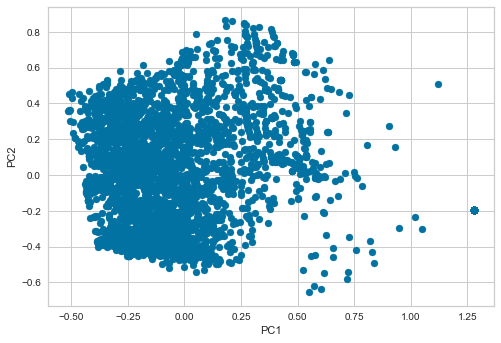

In [11]:
# pca 
pca = PCA()
X = pca.fit_transform(data)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

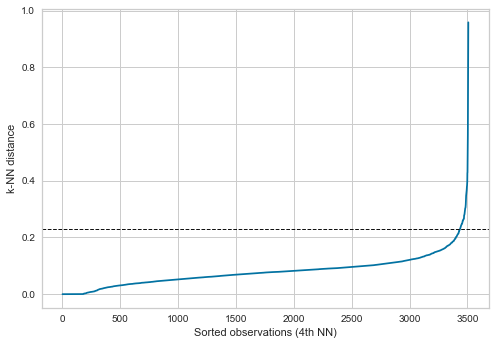

hi
0.1721986512233816


<Figure size 360x360 with 0 Axes>

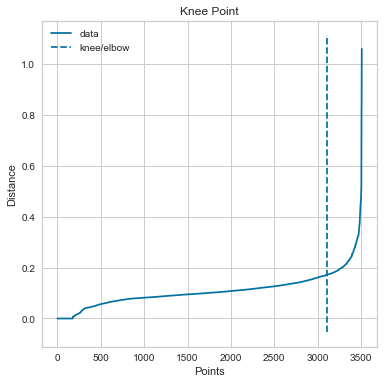

In [12]:
#kNN distnace plot
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=0.23, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
!pip install --upgrade kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
print("hi")
plt.ylabel("Distance")
print(distances[knee.knee])



{0, 1, 2, 3, -1}
Silhouette Score: 0.2476
Calinski Harabasz Score: 712.1666
Davies Bouldin Score: 1.4506


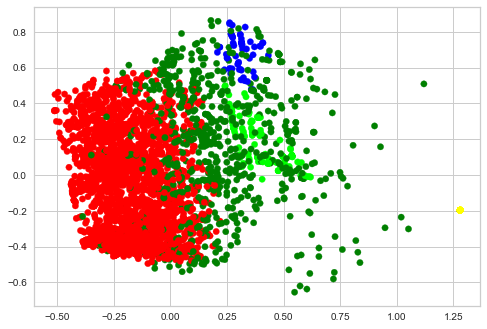

In [13]:
#dbscan clustering
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.1721986512233816, min_samples=39).fit(X)
# get cluster labels
col=np.array(['red','lime','yellow','blue','green'])
clusters.labels_
print(set(clusters.labels_))
p=np.unique(clusters.labels_)
plt.scatter(X[:,0], X[:,1], c =col[clusters.labels_], s=40)
score_dbscan_s = silhouette_score(X, clusters.labels_, metric='euclidean')
score_dbscan_c = calinski_harabasz_score(X,clusters.labels_)
score_dbscan_d = davies_bouldin_score(X,clusters.labels_)
print('Silhouette Score: %.4f' % score_dbscan_s)
print('Calinski Harabasz Score: %.4f' % score_dbscan_c)
print('Davies Bouldin Score: %.4f' % score_dbscan_d)



Text(0.5, 0, 'n_components')

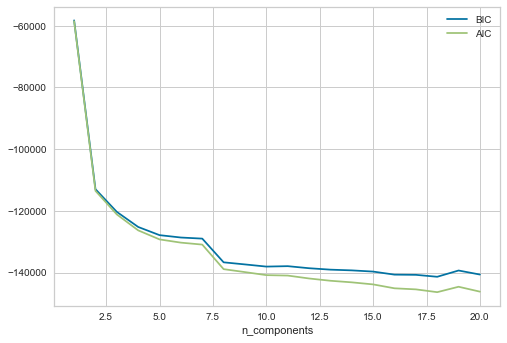

In [14]:
# gaussianmixture n_components
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full',random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Silhouette Score: 0.0358
Calinski Harabasz Score: 568.5903
Davies Bouldin Score: 2.7576


array([[0.00000000e+00, 4.16652889e-04, 9.99583347e-01, 2.73271720e-43],
       [0.00000000e+00, 2.34591555e-04, 9.99760942e-01, 4.46658364e-06],
       [0.00000000e+00, 1.05916541e-05, 3.55014614e-02, 9.64487947e-01],
       ...,
       [1.00000000e+00, 7.56389104e-26, 6.90890339e-27, 2.73081189e-20],
       [1.00000000e+00, 7.56389104e-26, 6.90890339e-27, 2.73081189e-20],
       [1.00000000e+00, 7.56389104e-26, 6.90890339e-27, 2.73081189e-20]])

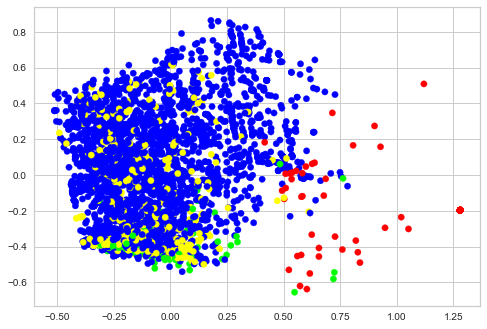

In [15]:
# gaussian clustering
col=np.array(['red','lime','yellow','blue'])
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=col[labels], s=40)

score_gmm_s = silhouette_score(X,labels, metric='euclidean')
score_gmm_c = calinski_harabasz_score(X,labels)
score_gmm_d = davies_bouldin_score(X,labels)
print('Silhouette Score: %.4f' % score_gmm_s)
print('Calinski Harabasz Score: %.4f' % score_gmm_c)
print('Davies Bouldin Score: %.4f' % score_gmm_d)
probabilities = gmm.predict_proba(X)
probabilities


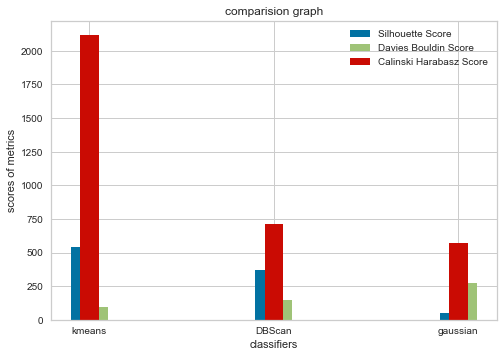

In [16]:
# comparison graph
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['kmeans','DBScan','gaussian',]
Silhouette_Score=[score_kemans_s*1500,score_dbscan_s*1500,score_gmm_s*1500]
CalinskiHarabasz_Score=[score_kemans_c,score_dbscan_c,score_gmm_c] 
DaviesBouldin_Score=[score_kemans_d*100,score_dbscan_d*100,score_gmm_d*100]


  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.05,Silhouette_Score,0.1,label = 'Silhouette Score')
plt.bar(X_axis + 0.05,DaviesBouldin_Score,0.1,label = 'Davies Bouldin Score')
plt.bar(X_axis,CalinskiHarabasz_Score,0.1,label='Calinski Harabasz Score')
  
plt.xticks(X_axis, X)
plt.xlabel("classifiers")
plt.ylabel("scores of metrics")
plt.title("comparision graph")
plt.legend()
plt.show()